In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Data

In [2]:
X_test = np.loadtxt("X_test.csv", delimiter=",", dtype=float)
X_train = np.loadtxt("X_train.csv", delimiter=",", dtype=float)
y_test = np.loadtxt("y_test.csv", delimiter=",", dtype=float)
y_train = np.loadtxt("y_train.csv", delimiter=",", dtype=float)

In [3]:
for elm in [X_test, X_train, y_test, y_train]:
    print(elm.shape)

(13901, 16)
(33724, 16)
(13901,)
(33724,)


In [4]:
unique, frequency = np.unique(y_train, return_counts = True)
length = len(y_train)
freqLst = []
for elm in frequency:
    freqLst.append(elm/length)

print(list(unique))
print(freqLst)

[0.0, 1.0, 2.0, 3.0, 4.0]
[0.5208753410034397, 0.09551061558533981, 0.25272802751749496, 0.04693986478472305, 0.08394615110900248]


['0: freq = 0.52', '1: freq = 0.1', '2: freq = 0.25', '3: freq = 0.05', '4: freq = 0.08']


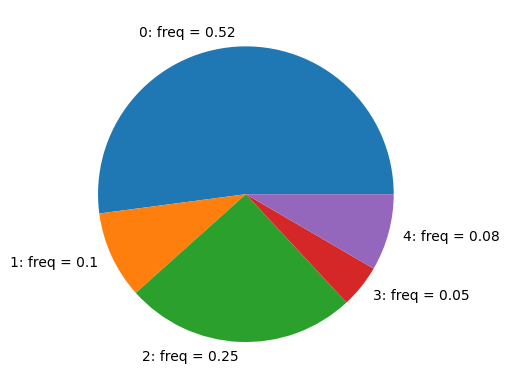

In [5]:
labels = []
for i in range(0, len(frequency)):
    labels.append(str(round(unique[i])) + ': freq = ' + str(round(freqLst[i], 2)))
print(labels)
plt.pie(freqLst, labels = labels)
plt.show() 

### Datasplit

In [6]:
print(np.shape(X_train))
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
print(np.shape(x_train), np.shape(x_val), np.shape(y_train), np.shape(y_val))

(33724, 16)
(26979, 16) (6745, 16) (26979,) (6745,)


# Models

### Multi-nominal logistic regression.

In [7]:
warnings.filterwarnings('ignore') 
log_model_train = LogisticRegression(multi_class = 'multinomial') 
log_model_train.fit(x_train, y_train) 
y_pred_val = log_model_train.predict(x_val) 
y_pred_test = log_model_train.predict(X_test) 
warnings.filterwarnings('default')

In [8]:
print("Logistic Regression 0-1 loss:",metrics.zero_one_loss(y_val, y_pred_val))
print("Logistic Regression 0-1 loss:",metrics.zero_one_loss(y_test, y_pred_test))

Logistic Regression 0-1 loss: 0.1543365455893254
Logistic Regression 0-1 loss: 0.09884180994173086


### Random forest

In [9]:
forest_model_train_50 = RandomForestClassifier(max_depth = 50, random_state=42)
forest_model_train_100 = RandomForestClassifier(max_depth = 100, random_state=42)
forest_model_train_200 = RandomForestClassifier(max_depth = 200, random_state=42)
forest_model_train_50.fit(x_train, y_train) 
forest_model_train_100.fit(x_train, y_train) 
forest_model_train_200.fit(x_train, y_train) 
y_pred_val_50 = forest_model_train_50.predict(x_val) 
y_pred_val_100 = forest_model_train_100.predict(x_val) 
y_pred_val_200 = forest_model_train_200.predict(x_val) 
y_pred_test_50 = forest_model_train_50.predict(X_test) 
y_pred_test_100 = forest_model_train_100.predict(X_test) 
y_pred_test_200 = forest_model_train_200.predict(X_test) 

In [10]:
print(forest_model_train_50.get_params())
print(forest_model_train_100.get_params())
print(forest_model_train_200.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 200, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 

In [11]:
print("Forest: 50 trees on val   :",metrics.zero_one_loss(y_val, y_pred_val_50))
print("Forest: 100 trees on val  :",metrics.zero_one_loss(y_val, y_pred_val_100))
print("Forest: 200 trees on val  :",metrics.zero_one_loss(y_val, y_pred_val_200))
print("Forest: 50 trees on train :",metrics.zero_one_loss(y_test, y_pred_test_50))
print("Forest: 100 trees on train:",metrics.zero_one_loss(y_test, y_pred_test_100))
print("Forest: 200 trees on train:",metrics.zero_one_loss(y_test, y_pred_test_200))

Forest: 50 trees on val   : 0.14988880652335068
Forest: 100 trees on val  : 0.14988880652335068
Forest: 200 trees on val  : 0.14988880652335068
Forest: 50 trees on train : 0.11121502050212217
Forest: 100 trees on train: 0.11121502050212217
Forest: 200 trees on train: 0.11121502050212217


### k-nearest-neighbor classification

In [12]:
k_range = range(1, 200, 1)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_val, y_val, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print('Score by k :', k_scores[:5])

for i in range(len(k_scores)):
    if k_scores[i] == max(k_scores):
        best_k = i
        print('Index :', i,'\nScore :', max(k_scores), '\nBest k: ', best_k)

Score by k : [0.8013343217197925, 0.7994069681245367, 0.8225352112676056, 0.8272794662713121, 0.831727205337287]
Index : 29 
Score : 0.8425500370644923 
Best k:  29


In [13]:
knn_model_train = KNeighborsClassifier(n_neighbors=best_k).fit(x_train, y_train) 
y_pred_val = knn_model_train.predict(x_val)
y_pred_test = knn_model_train.predict(X_test)

In [14]:
print("KNN 0-1 loss on validation:",metrics.zero_one_loss(y_val, y_pred_val))
print("KNN 0-1 loss on validation:",metrics.zero_one_loss(y_test, y_pred_test))

KNN 0-1 loss on validation: 0.15596738324684956
KNN 0-1 loss on validation: 0.10071217897992946
